In [9]:
import glob
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

#추가 



In [10]:
os.getcwd()

'c:\\deep\\utube'

In [12]:
# opencv library 설치
!pip install opencv-python

In [13]:
#초기 파라미터
epochs = 50
lr = 1e-3
batch_size = 32
img_dims = (96,96,3)
data = []
labels= []


image_files = [f for f in glob.glob(r'C:\deep\utube\set6'+ "/**/*", recursive =True) if not os.path.isdir(f)]
random.shuffle(image_files)


In [14]:
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # 
    if label == "error":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2)
testY= to_categorical(testY, num_classes=2)


In [16]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [39]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    


    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))



    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [40]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], 
              classes=2)


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)       

In [50]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import graphviz

In [49]:
pip install pydot
pip install graphviz

SyntaxError: invalid syntax (<ipython-input-49-0c69439b27c8>, line 1)

In [43]:
# compile the model
opt = Adam(learning_rate=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [44]:
# train the model
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

Epoch 1/50
157/157 [==============================] - 58s 362ms/step - loss: 0.4312 - accuracy: 0.8550 - val_loss: 13.5724 - val_accuracy: 0.0548
Epoch 2/50
157/157 [==============================] - 59s 376ms/step - loss: 0.0364 - accuracy: 0.9956 - val_loss: 46.7871 - val_accuracy: 0.0548
Epoch 3/50
157/157 [==============================] - 58s 368ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 6.9203 - val_accuracy: 0.6561
Epoch 4/50
157/157 [==============================] - 58s 369ms/step - loss: 0.0122 - accuracy: 0.9980 - val_loss: 0.0633 - val_accuracy: 0.9873
Epoch 5/50
157/157 [==============================] - 58s 369ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 4.4934e-04 - val_accuracy: 1.0000
Epoch 6/50
157/157 [==============================] - 59s 374ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 3.8158e-04 - val_accuracy: 1.0000
Epoch 7/50
157/157 [==============================] - 60s 385ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.589

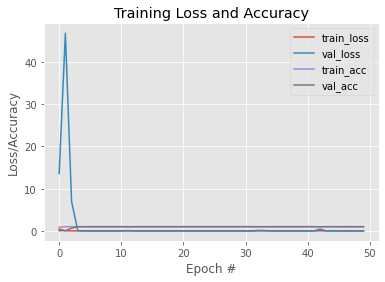

In [45]:

# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')

In [46]:
# save the model to disk
model.save('utubemodel.h5')


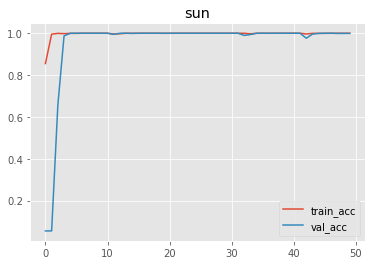

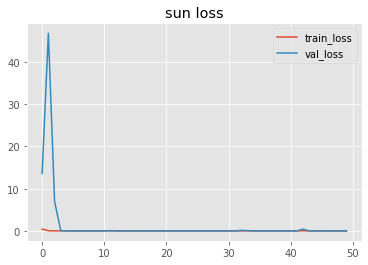

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt


epochs = epochs

plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")
plt.title('sun')
plt.legend()

plt.figure()

plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.title('sun loss')
plt.legend()

plt.show()

# save plot to disk
plt.savefig('sun.png')

In [ ]:
# 참조 유튜브 https://www.youtube.com/watch?v=WOuAI5DhHyU&ab_channel=BalajiSrinivasan

In [48]:
#모델을 도식화
from keras.utils import plot_model
plot_model(model, to_file='utube.svg')
# jupyter notebook에서 보기 위함
SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

ImportError: cannot import name 'plot_model' from 'keras.utils' (C:\Users\Kwon\anaconda3\lib\site-packages\keras\utils\__init__.py)